In [1]:
#Disable Warnings for deprecation and other issues
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
test = pd.read_pickle("X_test.pkl")
X = pd.read_pickle("X_train.pkl")
Y = pd.read_pickle("Y_train.pkl")

In [4]:
test.head()

,0,1,2,3,4
0,1.0,19.0,1465816.0,7.0,365.0
1,1.0,2.0,98177.0,2.0,365.0
2,1.0,19.0,2052922.0,7.0,365.0
3,3.0,15.0,201906.0,5.0,365.0
4,1.0,12.0,7450.0,5.0,365.0


In [5]:
X.head()

,0,1,2,3,4
0,3.0,12.0,241719.0,3.0,0.0
1,3.0,13.0,599497.0,6.0,0.0
2,1.0,19.0,51160.0,4.0,0.0
3,3.0,9.0,3634343.0,6.0,0.0
4,1.0,17.0,4076287.0,4.0,0.0


In [6]:
Y.head()

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [7]:
Y.value_counts()

0.0    23556
1.0      234
dtype: int64

In [8]:
X[1].value_counts()

19.0    5945
12.0    4746
17.0    3766
9.0     2309
18.0    1056
15.0     920
5.0      902
13.0     886
20.0     701
14.0     590
4.0      493
11.0     307
16.0     303
3.0      281
1.0      208
8.0      135
7.0      100
2.0       78
10.0      61
0.0        2
6.0        1
Name: 1, dtype: int64

In [9]:
#find lenght of X_Train dataframe
len(X)

23790

In [10]:
len(Y)

23790

In [11]:
#Import SMOTE
from imblearn.over_sampling import SMOTE


In [12]:
#Oversample the data
sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_resample(X, Y)

#Turn the oversampled data into a dataframe
Y_res = pd.DataFrame(Y_res)

#Check the value counts
Y_res[0].value_counts()


0.0    23556
1.0    23556
Name: 0, dtype: int64

In [13]:
#Import Train Test Split
from sklearn.model_selection import train_test_split

#Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, test_size = 0.2, random_state = 42)


In [14]:
#Import Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
#Import Roc Curve  
from sklearn.metrics import roc_curve, auc
#import XGBClassifier, RandomForestClassifier, KnearsNeighborsClassifier, logisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression



In [15]:

#Function for plotting ROC_AUC curve
def plot_roc_curve(Y_test, preds):
    fpr, tpr, thresholds = roc_curve(Y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      4726
         1.0       0.86      0.87      0.86      4697

    accuracy                           0.86      9423
   macro avg       0.86      0.86      0.86      9423
weighted avg       0.86      0.86      0.86      9423

Confusion matrix:
 [[4034  692]
 [ 594 4103]]


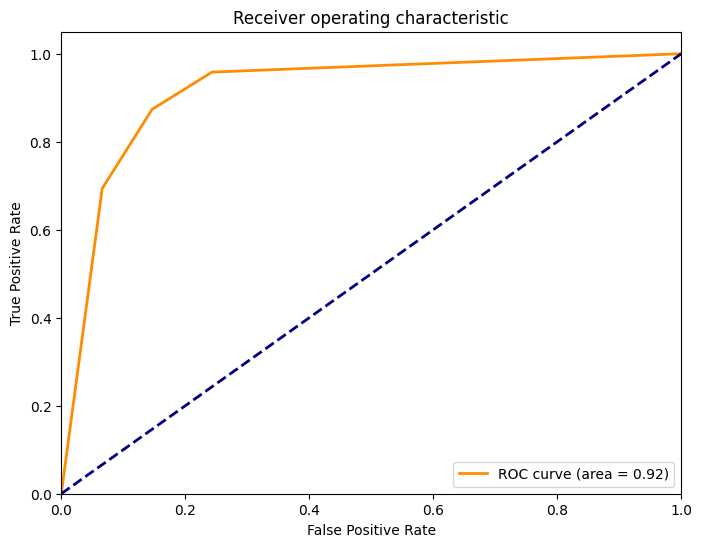

In [16]:
# Create K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, knn_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, knn_pred))
plot_roc_curve(Y_test, knn.predict_proba(X_test)[::,1])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      4726
         1.0       0.99      0.99      0.99      4697

    accuracy                           0.99      9423
   macro avg       0.99      0.99      0.99      9423
weighted avg       0.99      0.99      0.99      9423

Confusion matrix:
 [[4700   26]
 [  32 4665]]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


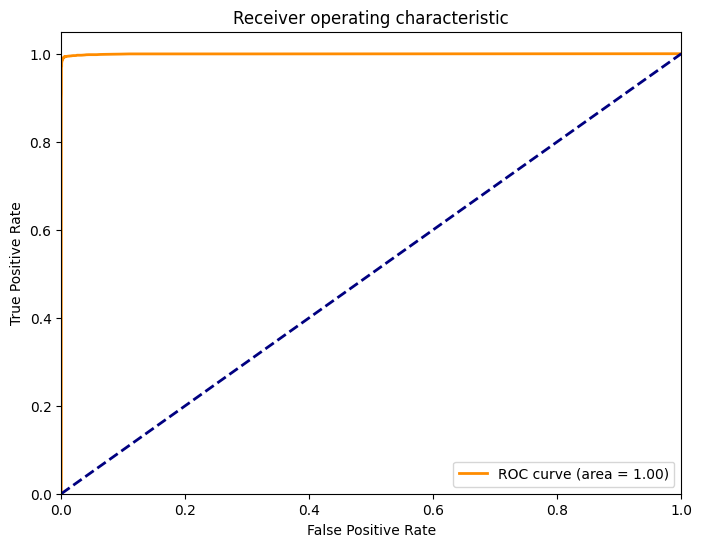

In [17]:
#Create Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced',verbose=1)
rfc.fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, rfc_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, rfc_pred))
plot_roc_curve(Y_test, rfc.predict_proba(X_test)[::,1])

Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4726
         1.0       1.00      0.99      1.00      4697

    accuracy                           1.00      9423
   macro avg       1.00      1.00      1.00      9423
weighted avg       1.00      1.00      1.00      9423

Confusion matrix:
 [[4713   13]
 [  33 4664]]


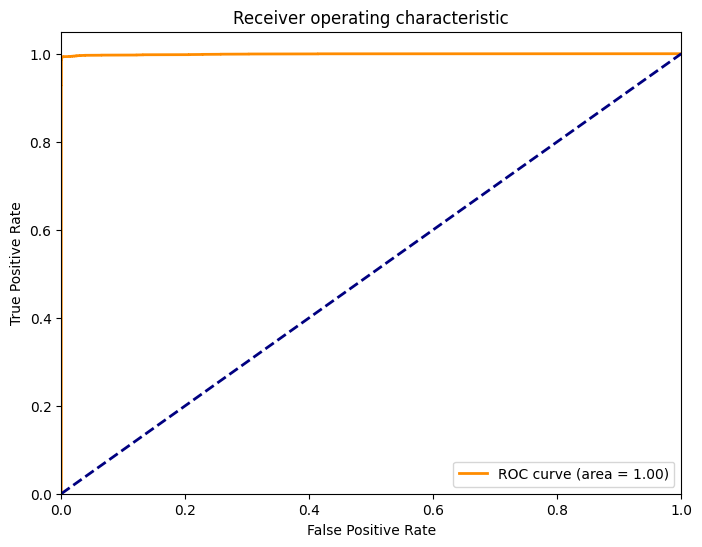

In [18]:
#Create XGBoost Classifier
xgb = XGBClassifier(n_estimators=100, random_state=42, verbosity=1, objective='binary:logistic',eval_metric='rmse')

xgb.fit(X_train, Y_train)
xgb_pred = xgb.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, xgb_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, xgb_pred))
plot_roc_curve(Y_test, xgb.predict_proba(X_test)[::,1])


In [19]:
#Check the accuracy of the model
print("Accuracy of the model is: ", accuracy_score(Y_test, xgb_pred))

Accuracy of the model is:  0.995118327496551


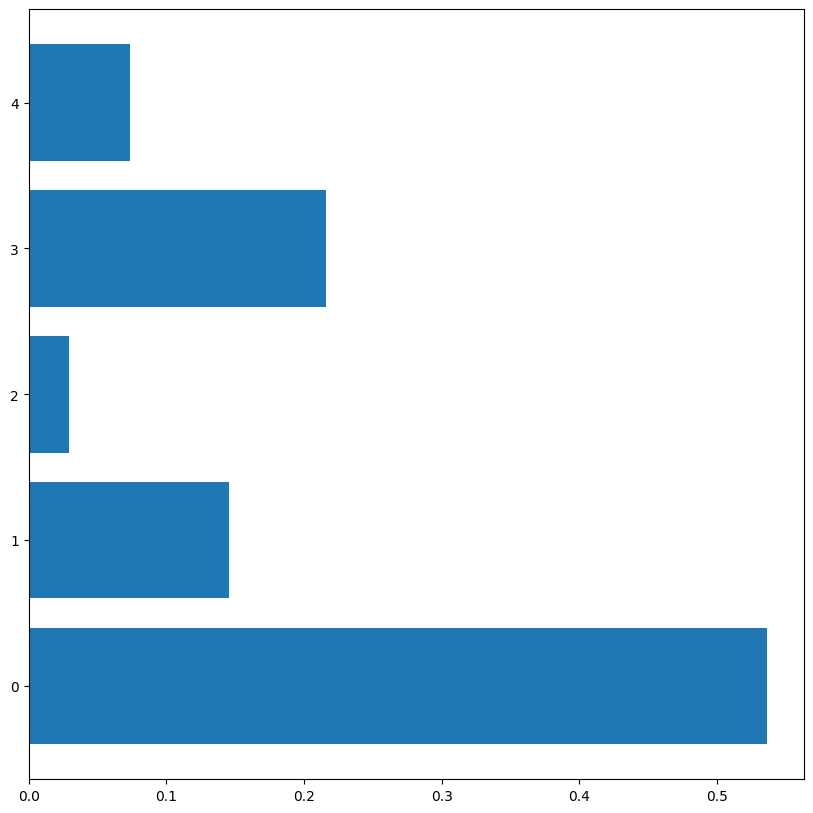

In [20]:
#Plot feature importance
plt.figure(figsize=(10, 10))
plt.barh(X.columns, xgb.feature_importances_)
plt.show()


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.50      1.00      0.67      4726
         1.0       0.00      0.00      0.00      4697

    accuracy                           0.50      9423
   macro avg       0.25      0.50      0.33      9423
weighted avg       0.25      0.50      0.34      9423

Confusion matrix:
 [[4726    0]
 [4697    0]]


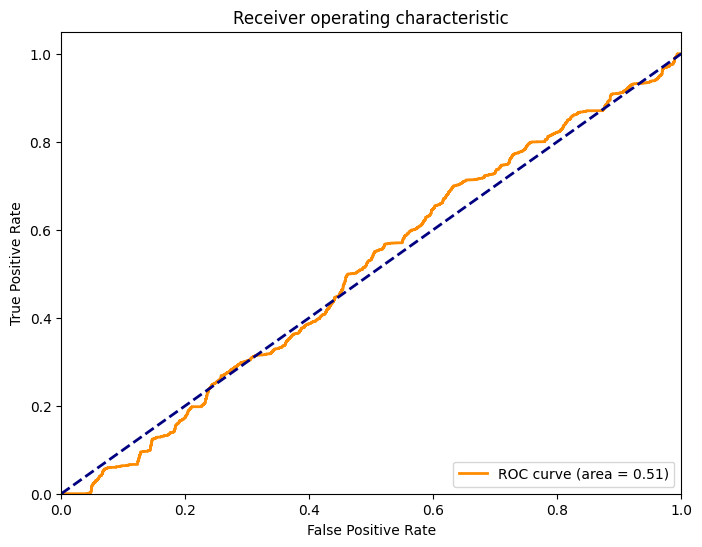

In [21]:
#Create Logistic Regression Classifier for fraud detection
lr = LogisticRegression(random_state=42, class_weight='balanced', verbose=1)
lr.fit(X_train, Y_train)
lr_pred = lr.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, lr_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, lr_pred))
plot_roc_curve(Y_test, lr.predict_proba(X_test)[::,1])

In [22]:
test.head()

,0,1,2,3,4
0,1.0,19.0,1465816.0,7.0,365.0
1,1.0,2.0,98177.0,2.0,365.0
2,1.0,19.0,2052922.0,7.0,365.0
3,3.0,15.0,201906.0,5.0,365.0
4,1.0,12.0,7450.0,5.0,365.0


In [23]:
len(test)


1845

In [24]:
#Use classifier to test the test data
xgb_pred_test = xgb.predict(test)
knn_pred_test = knn.predict(test)
rfc_pred_test = rfc.predict(test)
lr_pred_test = lr.predict(test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [25]:
#Create a dataframe with the results
results = pd.DataFrame({'XGB':xgb_pred_test, 'KNN':knn_pred_test, 'RFC':rfc_pred_test, 'LR':lr_pred_test})
results.head()



,XGB,KNN,RFC,LR
0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


In [26]:
results['XGB'].value_counts()

0.0    1844
1.0       1
Name: XGB, dtype: int64

In [27]:
results['KNN'].value_counts()

0.0    1364
1.0     481
Name: KNN, dtype: int64

In [28]:
results['RFC'].value_counts()

0.0    1844
1.0       1
Name: RFC, dtype: int64

In [29]:
results['LR'].value_counts()

0.0    1845
Name: LR, dtype: int64

In [30]:
#Predict probablity of fraud using models
xgb_pred_test_prob = xgb.predict_proba(test)
knn_pred_test_prob = knn.predict_proba(test)
rfc_pred_test_prob = rfc.predict_proba(test)
lr_pred_test_prob = lr.predict_proba(test)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [31]:
#print the probablity of fraud
print(xgb_pred_test_prob)
print(knn_pred_test_prob)
print(rfc_pred_test_prob)
print(lr_pred_test_prob)

[[9.9990201e-01 9.7968623e-05]
 [9.9243486e-01 7.5651384e-03]
 [9.9994838e-01 5.1622566e-05]
 ...
 [9.9995494e-01 4.5090412e-05]
 [9.9822819e-01 1.7717842e-03]
 [9.9993253e-01 6.7466928e-05]]
[[0.33333333 0.66666667]
 [1.         0.        ]
 [1.         0.        ]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]]
[[1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [1.   0.  ]
 [0.99 0.01]]
[[0.50892291 0.49107709]
 [0.5005977  0.4994023 ]
 [0.51249554 0.48750446]
 ...
 [0.50748914 0.49251086]
 [0.5009888  0.4990112 ]
 [0.50050612 0.49949388]]


In [32]:
#Create dataframe with probablity of fraud from xgb
xgb_pred_test_prob = pd.DataFrame(xgb_pred_test_prob)
xgb_pred_test_prob.head()

,0,1
0,0.999902,0.000098
1,0.992435,0.007565
2,0.999948,0.000052
3,0.999940,0.000060
4,0.999850,0.000150


In [33]:
#Create dataframe with probablity of fraud from knn
knn_pred_test_prob = pd.DataFrame(knn_pred_test_prob)
knn_pred_test_prob.head()

,0,1
0,0.333333,0.666667
1,1.000000,0.000000
2,1.000000,0.000000
3,0.666667,0.333333
4,1.000000,0.000000


In [34]:
#Create dataframe with probablity of fraud from rfc
rfc_pred_test_prob = pd.DataFrame(rfc_pred_test_prob)
rfc_pred_test_prob.head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [35]:
#Create dataframe with probablity of fraud from lr
lr_pred_test_prob = pd.DataFrame(lr_pred_test_prob)
lr_pred_test_prob.head()

,0,1
0,0.508923,0.491077
1,0.500598,0.499402
2,0.512496,0.487504
3,0.501229,0.498771
4,0.500045,0.499955


In [36]:
bTrain = pd.read_pickle("train_data.pkl")
bTest = pd.read_pickle("test_data.pkl")

In [37]:
bTrain.head()

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,date,sar_flag
1845,171142,a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bf...,3,12.0,241719.0,3,0,0.0
1846,171152,7e42b5dca9b28ee8e5545beb834361e90e6197d176b389...,3,13.0,599497.0,6,0,0.0
1847,171177,a6cdf6302aead77112013168c6d546d2df3bcb551956d2...,1,19.0,51160.0,4,0,0.0
1848,171178,1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...,3,9.0,3634343.0,6,0,0.0
1849,171180,67f8cbb64dd3d447e992b1b299e0ceed3372188e47c88e...,1,17.0,4076287.0,4,0,0.0


In [38]:
bTest.head()

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,date,sar_flag
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7,365,NaN
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,2,365,NaN
2,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,7,365,NaN
3,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,5,365,NaN
4,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,5,365,NaN


In [39]:
len(bTrain)


23790

In [40]:
len(bTest)

1845

In [41]:
#Create a dataframe with bTest alert_key column and xgb_pred_test_prob 1 column
my_submission = pd.DataFrame({'alert_key':bTest['alert_key'], 'probability':xgb_pred_test_prob[1]})
my_submission.head()




,alert_key,probability
0,352249,0.000098
1,352253,0.007565
2,352254,0.000052
3,352280,0.000060
4,352282,0.000150


In [42]:
#Import sample.cs to dataframe
sample = pd.read_csv("sample.csv")
sample.head()

,alert_key,probability
0,357307,0.000017
1,376329,0.000324
2,373644,0.000372
3,357668,0.000489
4,354443,0.000526


In [43]:
#Combine my_submission and sample and replace the probability column with my_submission probability column
my_submission_combine = pd.merge(sample, my_submission, on='alert_key', how='left')
my_submission_combine.head()


,alert_key,probability_x,probability_y
0,357307,0.000017,0.000120
1,376329,0.000324,NaN
2,373644,0.000372,NaN
3,357668,0.000489,0.000174
4,354443,0.000526,0.000294


In [44]:
#Drop probability_x column
my_submission_combine = my_submission_combine.drop(['probability_x'], axis=1)

In [45]:
#rename probability_y column to probability
my_submission_combine = my_submission_combine.rename(columns={'probability_y': 'probability'})


In [46]:
#My submission combine dataframe head
my_submission_combine.head()

,alert_key,probability
0,357307,0.000120
1,376329,NaN
2,373644,NaN
3,357668,0.000174
4,354443,0.000294


In [47]:
#Replace NaN values with either 0 or 1
my_submission_combine['probability'] = my_submission_combine['probability'].fillna(0)



In [48]:
#My submission combine dataframe head
my_submission_combine.head()

,alert_key,probability
0,357307,0.000120
1,376329,0.000000
2,373644,0.000000
3,357668,0.000174
4,354443,0.000294


In [49]:
#convert the dataframe to csv
my_submission_combine.to_csv('submission.csv', index=False)


In [50]:
#Implement kfolds cross validation to check the accuracy of the model
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xgb, X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))



Accuracy: 99.41 %
Standard Deviation: 0.09 %


In [51]:
#Create Voting Classifier
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('xgb', xgb), ('knn', knn), ('rfc', rfc)], voting='soft')
voting_clf.fit(X_train, Y_train)

#Check the accuracy of the model
for clf in (xgb, knn, rfc, voting_clf):
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, y_pred))



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.4s finished


XGBClassifier 0.995118327496551
KNeighborsClassifier 0.8635254165340125


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomForestClassifier 0.9938448477130426


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


VotingClassifier 0.9936326010824578


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [52]:
#Voting Classifier Classification report
print("Classification report for classifier :", classification_report(Y_test, y_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, y_pred))


Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      4726
         1.0       0.99      0.99      0.99      4697

    accuracy                           0.99      9423
   macro avg       0.99      0.99      0.99      9423
weighted avg       0.99      0.99      0.99      9423

Confusion matrix:
 [[4694   32]
 [  28 4669]]


In [53]:
#Voting Classifier probaility prediction
voting_clf_pred_test_prob = voting_clf.predict_proba(test)
voting_clf_pred_test_prob = pd.DataFrame(voting_clf_pred_test_prob)
voting_clf_pred_test_prob.head()


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


,0,1
0,0.777745,0.222255
1,0.997478,0.002522
2,0.999983,0.000017
3,0.888869,0.111131
4,0.999950,0.000050


In [54]:
#Length of voting_clf_pred_test_prob
len(voting_clf_pred_test_prob)



1845

In [55]:
##Create a dataframe with bTest alert_key column and voting_clf_pred_test_prob 1 column
my_submission_voting_clf = pd.DataFrame({'alert_key':bTest['alert_key'], 'probability':voting_clf_pred_test_prob[1]})
my_submission_voting_clf.head()

,alert_key,probability
0,352249,0.222255
1,352253,0.002522
2,352254,0.000017
3,352280,0.111131
4,352282,0.000050


In [56]:
#Combine my_submission_voting_clf and sample and replace the probability column with my_submission_voting_clf probability column
my_submission_voting_clf_combine = pd.merge(sample, my_submission_voting_clf, on='alert_key', how='left')
my_submission_voting_clf_combine.head()

,alert_key,probability_x,probability_y
0,357307,0.000017,0.228929
1,376329,0.000324,NaN
2,373644,0.000372,NaN
3,357668,0.000489,0.333391
4,354443,0.000526,0.000098


In [57]:
#Drop probability_x column
my_submission_voting_clf_combine = my_submission_voting_clf_combine.drop(['probability_x'], axis=1)

#rename probability_y column to probability
my_submission_voting_clf_combine = my_submission_voting_clf_combine.rename(columns={'probability_y': 'probability'})

In [58]:
#Replace NaN values with 0
my_submission_voting_clf_combine['probability'] = my_submission_voting_clf_combine['probability'].fillna(0)

#show the head of my_submission_voting_clf_combine
my_submission_voting_clf_combine.head()

,alert_key,probability
0,357307,0.228929
1,376329,0.000000
2,373644,0.000000
3,357668,0.333391
4,354443,0.000098


In [59]:
#convert the dataframe to csv
my_submission_voting_clf_combine.to_csv('submission_voting_clf.csv', index=False)


In [60]:
#Import Optuna
import optuna


In [61]:
#Create a function to optimize the hyperparameters of xgb
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.4, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
    }
    xgb = XGBClassifier(**param)
    xgb.fit(X_train, Y_train)
    y_pred = xgb.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    return accuracy



    

In [62]:
#Create a study object and optimize the hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

#Print the best parameters
print(study.best_params)

#Print the best value
print(study.best_value)


[I 2022-12-11 11:58:12,386] A new study created in memory with name: no-name-7a381c65-e1ac-400c-a599-43af78ed6b8e


[11:58:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 11:58:25,394] Trial 0 finished with value: 0.9921468746683646 and parameters: {'n_estimators': 485, 'max_depth': 10, 'learning_rate': 0.010801112890811286, 'subsample': 0.6470012113992714, 'colsample_bytree': 0.4051084631785208, 'gamma': 1.5298892663161983e-07, 'reg_alpha': 4.515428724962226e-05, 'reg_lambda': 7.88167650901064e-08}. Best is trial 0 with value: 0.9921468746683646.


[11:58:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 11:58:34,968] Trial 1 finished with value: 0.9938448477130426 and parameters: {'n_estimators': 505, 'max_depth': 9, 'learning_rate': 0.48367866227050665, 'subsample': 0.5021944557273916, 'colsample_bytree': 0.41525639393977487, 'gamma': 0.12270640413508077, 'reg_alpha': 4.055373943715618e-06, 'reg_lambda': 0.0001078726299241714}. Best is trial 1 with value: 0.9938448477130426.


[11:58:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 11:58:42,783] Trial 2 finished with value: 0.9916162580919028 and parameters: {'n_estimators': 373, 'max_depth': 7, 'learning_rate': 0.024788578447927333, 'subsample': 0.5265912592728907, 'colsample_bytree': 0.42514756788744934, 'gamma': 7.983675256785534e-05, 'reg_alpha': 4.2450992622014534e-08, 'reg_lambda': 0.034859655215950844}. Best is trial 1 with value: 0.9938448477130426.


[11:58:42] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 11:58:49,036] Trial 3 finished with value: 0.9936326010824578 and parameters: {'n_estimators': 347, 'max_depth': 6, 'learning_rate': 0.27691117134289805, 'subsample': 0.6099118548287786, 'colsample_bytree': 0.4777156047343764, 'gamma': 1.3224986832739941e-08, 'reg_alpha': 1.3471847602909308e-05, 'reg_lambda': 0.031164720730444354}. Best is trial 1 with value: 0.9938448477130426.


[11:58:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 11:59:00,781] Trial 4 finished with value: 0.9900244083625173 and parameters: {'n_estimators': 864, 'max_depth': 4, 'learning_rate': 0.02425100050672938, 'subsample': 0.4854748395638072, 'colsample_bytree': 0.7895316024666333, 'gamma': 0.040581892495656025, 'reg_alpha': 0.0004040783154101368, 'reg_lambda': 0.028959711868237346}. Best is trial 1 with value: 0.9938448477130426.


[11:59:00] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 11:59:05,948] Trial 5 finished with value: 0.9944815876047968 and parameters: {'n_estimators': 466, 'max_depth': 3, 'learning_rate': 0.32584321592192317, 'subsample': 0.41802042070122186, 'colsample_bytree': 0.7210602581116466, 'gamma': 0.1457505320370949, 'reg_alpha': 0.0009356861950603378, 'reg_lambda': 0.00639785363616667}. Best is trial 5 with value: 0.9944815876047968.


[11:59:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 11:59:24,182] Trial 6 finished with value: 0.9946938342353815 and parameters: {'n_estimators': 864, 'max_depth': 10, 'learning_rate': 0.050085741415805005, 'subsample': 0.4213613320977276, 'colsample_bytree': 0.44007409226133787, 'gamma': 1.0601955497562428e-08, 'reg_alpha': 9.07024286406601e-06, 'reg_lambda': 6.438755011269748e-08}. Best is trial 6 with value: 0.9946938342353815.


[11:59:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 11:59:32,878] Trial 7 finished with value: 0.9867345855884538 and parameters: {'n_estimators': 584, 'max_depth': 4, 'learning_rate': 0.023880944965679742, 'subsample': 0.8054978499029603, 'colsample_bytree': 0.8266515381927253, 'gamma': 0.03080936141706484, 'reg_alpha': 1.123754333183923e-08, 'reg_lambda': 0.0015661401331925559}. Best is trial 6 with value: 0.9946938342353815.


[11:59:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 11:59:52,291] Trial 8 finished with value: 0.9950122041812586 and parameters: {'n_estimators': 909, 'max_depth': 8, 'learning_rate': 0.40489658038463117, 'subsample': 0.9993482467923338, 'colsample_bytree': 0.6846217454117686, 'gamma': 3.305200878216551e-07, 'reg_alpha': 6.529172640773385e-07, 'reg_lambda': 7.572140021234358e-06}. Best is trial 8 with value: 0.9950122041812586.


[11:59:52] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:00:00,642] Trial 9 finished with value: 0.995118327496551 and parameters: {'n_estimators': 383, 'max_depth': 7, 'learning_rate': 0.05137896862657989, 'subsample': 0.6103149217646776, 'colsample_bytree': 0.8324831134273438, 'gamma': 0.6598998908897752, 'reg_alpha': 4.156595718060132e-05, 'reg_lambda': 5.108377258049568e-07}. Best is trial 9 with value: 0.995118327496551.


[12:00:00] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:00:03,766] Trial 10 finished with value: 0.9947999575506739 and parameters: {'n_estimators': 155, 'max_depth': 6, 'learning_rate': 0.12423923723963097, 'subsample': 0.7201733813959107, 'colsample_bytree': 0.997478941356702, 'gamma': 0.0005971460110500015, 'reg_alpha': 0.14246619582253223, 'reg_lambda': 3.456930247564074e-06}. Best is trial 9 with value: 0.995118327496551.


[12:00:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:00:19,566] Trial 11 finished with value: 0.9950122041812586 and parameters: {'n_estimators': 703, 'max_depth': 8, 'learning_rate': 0.10932878152787129, 'subsample': 0.9948561396840597, 'colsample_bytree': 0.5830189365353359, 'gamma': 1.03806785133289e-05, 'reg_alpha': 3.496263950175866e-07, 'reg_lambda': 5.401223058919647e-06}. Best is trial 9 with value: 0.995118327496551.


[12:00:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:00:22,340] Trial 12 finished with value: 0.9919346280377799 and parameters: {'n_estimators': 101, 'max_depth': 8, 'learning_rate': 0.06115577435003719, 'subsample': 0.9394121217626592, 'colsample_bytree': 0.6222204836101501, 'gamma': 1.7493839518182896e-06, 'reg_alpha': 0.003118994820103299, 'reg_lambda': 2.1130445079338853e-06}. Best is trial 9 with value: 0.995118327496551.


[12:00:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:00:37,973] Trial 13 finished with value: 0.9945877109200891 and parameters: {'n_estimators': 715, 'max_depth': 7, 'learning_rate': 0.14851769989109379, 'subsample': 0.8260559092262544, 'colsample_bytree': 0.9454431417161865, 'gamma': 0.0007521013456353115, 'reg_alpha': 4.0915168162374166e-07, 'reg_lambda': 8.979952131928853e-05}. Best is trial 9 with value: 0.995118327496551.


[12:00:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:00:59,347] Trial 14 finished with value: 0.9949060808659662 and parameters: {'n_estimators': 953, 'max_depth': 8, 'learning_rate': 0.047779044731201835, 'subsample': 0.6293640824148649, 'colsample_bytree': 0.7051562150559314, 'gamma': 0.0031919901041509175, 'reg_alpha': 0.03456927351266689, 'reg_lambda': 1.247657048152753e-08}. Best is trial 9 with value: 0.995118327496551.


[12:00:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:01:03,292] Trial 15 finished with value: 0.9945877109200891 and parameters: {'n_estimators': 261, 'max_depth': 5, 'learning_rate': 0.2082392575027128, 'subsample': 0.5586811363782109, 'colsample_bytree': 0.5524638982761886, 'gamma': 1.4238251550330632e-06, 'reg_alpha': 8.875136134528525e-07, 'reg_lambda': 5.037907562583069e-07}. Best is trial 9 with value: 0.995118327496551.


[12:01:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:01:20,436] Trial 16 finished with value: 0.9947999575506739 and parameters: {'n_estimators': 662, 'max_depth': 9, 'learning_rate': 0.08432909902857053, 'subsample': 0.7205486609411762, 'colsample_bytree': 0.8353386092100281, 'gamma': 0.8505763452116891, 'reg_alpha': 0.00868696103107503, 'reg_lambda': 5.8227735171391595e-05}. Best is trial 9 with value: 0.995118327496551.


[12:01:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:01:43,671] Trial 17 finished with value: 0.9955428207577205 and parameters: {'n_estimators': 968, 'max_depth': 7, 'learning_rate': 0.03565706507542629, 'subsample': 0.8734851348573178, 'colsample_bytree': 0.7238372132784819, 'gamma': 2.288313134186618e-05, 'reg_alpha': 0.0001536816458188244, 'reg_lambda': 2.6854633100422856e-05}. Best is trial 17 with value: 0.9955428207577205.


[12:01:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:01:57,748] Trial 18 finished with value: 0.995118327496551 and parameters: {'n_estimators': 788, 'max_depth': 5, 'learning_rate': 0.03455706688255625, 'subsample': 0.8424725760482327, 'colsample_bytree': 0.9018707201810524, 'gamma': 3.091471003232206e-05, 'reg_alpha': 0.9774877488154475, 'reg_lambda': 0.944365301959483}. Best is trial 17 with value: 0.9955428207577205.


[12:01:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:02:03,211] Trial 19 finished with value: 0.9610527432877003 and parameters: {'n_estimators': 267, 'max_depth': 6, 'learning_rate': 0.011914788992581919, 'subsample': 0.7493636766260168, 'colsample_bytree': 0.7732079935982864, 'gamma': 0.0025979400454782127, 'reg_alpha': 0.00016441685911005392, 'reg_lambda': 0.0005505466180322219}. Best is trial 17 with value: 0.9955428207577205.


[12:02:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:02:15,676] Trial 20 finished with value: 0.9928897378754112 and parameters: {'n_estimators': 580, 'max_depth': 7, 'learning_rate': 0.01760893371123807, 'subsample': 0.5883259740072682, 'colsample_bytree': 0.6514171435641476, 'gamma': 0.0002796103686433969, 'reg_alpha': 3.920936966048509e-05, 'reg_lambda': 4.453279507023231e-07}. Best is trial 17 with value: 0.9955428207577205.


[12:02:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:02:33,736] Trial 21 finished with value: 0.995118327496551 and parameters: {'n_estimators': 990, 'max_depth': 5, 'learning_rate': 0.03639848761354764, 'subsample': 0.8728361154385806, 'colsample_bytree': 0.8844464469674488, 'gamma': 1.376007993219686e-05, 'reg_alpha': 0.17727190623448832, 'reg_lambda': 0.34766189817217397}. Best is trial 17 with value: 0.9955428207577205.


[12:02:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:02:48,015] Trial 22 finished with value: 0.9952244508118434 and parameters: {'n_estimators': 798, 'max_depth': 5, 'learning_rate': 0.035853905557302744, 'subsample': 0.8762255464333103, 'colsample_bytree': 0.9194721780867625, 'gamma': 2.9850273785279984e-05, 'reg_alpha': 0.586731428374839, 'reg_lambda': 0.8544048906154004}. Best is trial 17 with value: 0.9955428207577205.


[12:02:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:03:01,951] Trial 23 finished with value: 0.9954366974424281 and parameters: {'n_estimators': 791, 'max_depth': 5, 'learning_rate': 0.03438672135452919, 'subsample': 0.8890423000012179, 'colsample_bytree': 0.9139797126838772, 'gamma': 2.7885753170413798e-05, 'reg_alpha': 0.963583451599965, 'reg_lambda': 0.24064268556303983}. Best is trial 17 with value: 0.9955428207577205.


[12:03:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:03:15,955] Trial 24 finished with value: 0.9936326010824578 and parameters: {'n_estimators': 811, 'max_depth': 4, 'learning_rate': 0.0352684132715711, 'subsample': 0.9097963870979344, 'colsample_bytree': 0.9997629499411731, 'gamma': 5.026641810382777e-06, 'reg_alpha': 0.8478767386794714, 'reg_lambda': 0.16028106134399084}. Best is trial 17 with value: 0.9955428207577205.


[12:03:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:03:25,200] Trial 25 finished with value: 0.9679507587817043 and parameters: {'n_estimators': 765, 'max_depth': 3, 'learning_rate': 0.016686641627644182, 'subsample': 0.7726714448612794, 'colsample_bytree': 0.7589524482624767, 'gamma': 9.75910980011709e-05, 'reg_alpha': 0.031353196767923905, 'reg_lambda': 0.9912876557088783}. Best is trial 17 with value: 0.9955428207577205.


[12:03:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:03:41,886] Trial 26 finished with value: 0.9950122041812586 and parameters: {'n_estimators': 916, 'max_depth': 5, 'learning_rate': 0.07535190640676268, 'subsample': 0.9117765682049285, 'colsample_bytree': 0.9015333438678647, 'gamma': 4.2306097641680045e-05, 'reg_alpha': 0.15077394809312733, 'reg_lambda': 0.1230313490168335}. Best is trial 17 with value: 0.9955428207577205.


[12:03:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:03:53,563] Trial 27 finished with value: 0.9888570518943012 and parameters: {'n_estimators': 648, 'max_depth': 6, 'learning_rate': 0.017267192685662732, 'subsample': 0.6950039296129568, 'colsample_bytree': 0.5054697860331414, 'gamma': 3.130549695312534e-06, 'reg_alpha': 0.005878114845687366, 'reg_lambda': 0.005860233437989201}. Best is trial 17 with value: 0.9955428207577205.


[12:03:53] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:04:06,020] Trial 28 finished with value: 0.993101984505996 and parameters: {'n_estimators': 846, 'max_depth': 4, 'learning_rate': 0.029306364292210653, 'subsample': 0.6787503916439883, 'colsample_bytree': 0.9236579198446393, 'gamma': 3.9596110684161606e-07, 'reg_alpha': 0.032932846203946216, 'reg_lambda': 2.7610861268309853e-05}. Best is trial 17 with value: 0.9955428207577205.


[12:04:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:04:23,978] Trial 29 finished with value: 0.9870529555343309 and parameters: {'n_estimators': 988, 'max_depth': 5, 'learning_rate': 0.010121593329341157, 'subsample': 0.7816682634085458, 'colsample_bytree': 0.7432223431823652, 'gamma': 5.387284667007667e-08, 'reg_alpha': 0.3043052875831857, 'reg_lambda': 0.00046754487703324737}. Best is trial 17 with value: 0.9955428207577205.


[12:04:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:04:39,868] Trial 30 finished with value: 0.9953305741271358 and parameters: {'n_estimators': 746, 'max_depth': 6, 'learning_rate': 0.04210087119303449, 'subsample': 0.8671447320697858, 'colsample_bytree': 0.8473348435244812, 'gamma': 0.0004059616324931582, 'reg_alpha': 0.0009163301897017064, 'reg_lambda': 0.0037351372072271546}. Best is trial 17 with value: 0.9955428207577205.


[12:04:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:04:55,341] Trial 31 finished with value: 0.995118327496551 and parameters: {'n_estimators': 748, 'max_depth': 6, 'learning_rate': 0.04448978206542312, 'subsample': 0.8682388854420949, 'colsample_bytree': 0.8459660134601157, 'gamma': 0.00017738515584440008, 'reg_alpha': 0.0010063469422194541, 'reg_lambda': 0.005883538229205309}. Best is trial 17 with value: 0.9955428207577205.


[12:04:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:05:10,839] Trial 32 finished with value: 0.995118327496551 and parameters: {'n_estimators': 888, 'max_depth': 5, 'learning_rate': 0.06377601405310063, 'subsample': 0.9320850271098519, 'colsample_bytree': 0.7939822416473868, 'gamma': 0.00272842275784717, 'reg_alpha': 0.000159105998732776, 'reg_lambda': 0.11588482164725206}. Best is trial 17 with value: 0.9955428207577205.


[12:05:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:05:25,996] Trial 33 finished with value: 0.9953305741271358 and parameters: {'n_estimators': 644, 'max_depth': 7, 'learning_rate': 0.028564224592114048, 'subsample': 0.8632062298705259, 'colsample_bytree': 0.9460605782869057, 'gamma': 1.4838005337258255e-05, 'reg_alpha': 0.014404623297378119, 'reg_lambda': 0.00033592675852528496}. Best is trial 17 with value: 0.9955428207577205.


[12:05:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:05:40,802] Trial 34 finished with value: 0.9947999575506739 and parameters: {'n_estimators': 613, 'max_depth': 7, 'learning_rate': 0.020380193490843013, 'subsample': 0.8210380489577368, 'colsample_bytree': 0.958731360374854, 'gamma': 1.0709136045257042e-05, 'reg_alpha': 0.0014122533082883428, 'reg_lambda': 0.000309824436545472}. Best is trial 17 with value: 0.9955428207577205.


[12:05:40] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:05:55,398] Trial 35 finished with value: 0.994269340974212 and parameters: {'n_estimators': 461, 'max_depth': 9, 'learning_rate': 0.01335815607937398, 'subsample': 0.9712565196025675, 'colsample_bytree': 0.8619289671285303, 'gamma': 0.0007451154942002209, 'reg_alpha': 0.01980418106656736, 'reg_lambda': 0.0016381035720500609}. Best is trial 17 with value: 0.9955428207577205.


[12:05:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:06:06,041] Trial 36 finished with value: 0.9940570943436273 and parameters: {'n_estimators': 525, 'max_depth': 6, 'learning_rate': 0.028016514053586215, 'subsample': 0.7576987527333313, 'colsample_bytree': 0.8014739830579443, 'gamma': 5.6491164153279963e-05, 'reg_alpha': 0.0003121804436864316, 'reg_lambda': 2.643145958704542e-05}. Best is trial 17 with value: 0.9955428207577205.


[12:06:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:06:21,813] Trial 37 finished with value: 0.9952244508118434 and parameters: {'n_estimators': 704, 'max_depth': 7, 'learning_rate': 0.08539340571559378, 'subsample': 0.8829722183520136, 'colsample_bytree': 0.7372327159967458, 'gamma': 0.010491628633669002, 'reg_alpha': 0.0028873981558234204, 'reg_lambda': 0.013993079715602642}. Best is trial 17 with value: 0.9955428207577205.


[12:06:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:06:37,289] Trial 38 finished with value: 0.9945877109200891 and parameters: {'n_estimators': 832, 'max_depth': 6, 'learning_rate': 0.022652447358966186, 'subsample': 0.6601414666456564, 'colsample_bytree': 0.6511522443872969, 'gamma': 0.00025600516643672455, 'reg_alpha': 0.0005382432633465995, 'reg_lambda': 0.0002215091030876387}. Best is trial 17 with value: 0.9955428207577205.


[12:06:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:06:54,282] Trial 39 finished with value: 0.9954366974424281 and parameters: {'n_estimators': 635, 'max_depth': 8, 'learning_rate': 0.028768829530002333, 'subsample': 0.9569067942850676, 'colsample_bytree': 0.8812500252941169, 'gamma': 7.515495902173778e-07, 'reg_alpha': 3.3796486946620452e-06, 'reg_lambda': 0.0013154200029688206}. Best is trial 17 with value: 0.9955428207577205.


[12:06:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:07:13,384] Trial 40 finished with value: 0.9956489440730129 and parameters: {'n_estimators': 661, 'max_depth': 10, 'learning_rate': 0.028677385399542694, 'subsample': 0.8003786537848039, 'colsample_bytree': 0.6798321836201318, 'gamma': 8.684960471978671e-08, 'reg_alpha': 2.42639336175265e-06, 'reg_lambda': 0.0012545680361994815}. Best is trial 40 with value: 0.9956489440730129.


[12:07:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:07:33,129] Trial 41 finished with value: 0.9957550673883052 and parameters: {'n_estimators': 645, 'max_depth': 10, 'learning_rate': 0.028480475755725498, 'subsample': 0.9522068820224315, 'colsample_bytree': 0.6962386366359293, 'gamma': 2.7267873092445635e-08, 'reg_alpha': 1.8859247231342567e-06, 'reg_lambda': 0.0011459873653692774}. Best is trial 41 with value: 0.9957550673883052.


[12:07:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:07:51,263] Trial 42 finished with value: 0.9955428207577205 and parameters: {'n_estimators': 554, 'max_depth': 10, 'learning_rate': 0.014969750114907181, 'subsample': 0.9535449454991789, 'colsample_bytree': 0.6988384650552865, 'gamma': 4.9838915859844105e-08, 'reg_alpha': 2.2003154851521797e-06, 'reg_lambda': 0.001203694588075773}. Best is trial 41 with value: 0.9957550673883052.


[12:07:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:08:05,507] Trial 43 finished with value: 0.9953305741271358 and parameters: {'n_estimators': 433, 'max_depth': 10, 'learning_rate': 0.014849703801909966, 'subsample': 0.9575503836118964, 'colsample_bytree': 0.6939495208019167, 'gamma': 4.091282212568273e-08, 'reg_alpha': 3.93950524124109e-06, 'reg_lambda': 0.0013186658705138614}. Best is trial 41 with value: 0.9957550673883052.


[12:08:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:08:22,465] Trial 44 finished with value: 0.9957550673883052 and parameters: {'n_estimators': 545, 'max_depth': 10, 'learning_rate': 0.02087164690535612, 'subsample': 0.9516784394241521, 'colsample_bytree': 0.6078523467198678, 'gamma': 3.3976680856560133e-08, 'reg_alpha': 2.4276861864869543e-06, 'reg_lambda': 0.016080673520020593}. Best is trial 41 with value: 0.9957550673883052.


[12:08:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:08:38,381] Trial 45 finished with value: 0.9954366974424281 and parameters: {'n_estimators': 534, 'max_depth': 10, 'learning_rate': 0.019838147372805322, 'subsample': 0.796987496235966, 'colsample_bytree': 0.6122905186113686, 'gamma': 9.467269468155045e-08, 'reg_alpha': 6.771241640355514e-08, 'reg_lambda': 0.030685342947944342}. Best is trial 41 with value: 0.9957550673883052.


[12:08:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:08:55,133] Trial 46 finished with value: 0.9955428207577205 and parameters: {'n_estimators': 487, 'max_depth': 10, 'learning_rate': 0.013701747302504931, 'subsample': 0.9836202427814511, 'colsample_bytree': 0.6733582369796162, 'gamma': 2.3306968594302242e-08, 'reg_alpha': 1.6456661799080926e-05, 'reg_lambda': 0.002836747726536482}. Best is trial 41 with value: 0.9957550673883052.


[12:08:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:09:12,250] Trial 47 finished with value: 0.9936326010824578 and parameters: {'n_estimators': 567, 'max_depth': 10, 'learning_rate': 0.012508908000532337, 'subsample': 0.9980096389902924, 'colsample_bytree': 0.592357909678149, 'gamma': 1.2757148567234771e-08, 'reg_alpha': 1.3866807084411673e-05, 'reg_lambda': 0.01757543637982864}. Best is trial 41 with value: 0.9957550673883052.


[12:09:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:09:24,192] Trial 48 finished with value: 0.9943754642895044 and parameters: {'n_estimators': 502, 'max_depth': 9, 'learning_rate': 0.014421507990778269, 'subsample': 0.4006816909080695, 'colsample_bytree': 0.6561930513209694, 'gamma': 3.094585711441329e-08, 'reg_alpha': 1.386820008178008e-06, 'reg_lambda': 0.0025466239253711495}. Best is trial 41 with value: 0.9957550673883052.


[12:09:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:09:34,587] Trial 49 finished with value: 0.9941632176589197 and parameters: {'n_estimators': 403, 'max_depth': 9, 'learning_rate': 0.023169504475111194, 'subsample': 0.9204805050650747, 'colsample_bytree': 0.5463373989246907, 'gamma': 1.8615452286320058e-07, 'reg_alpha': 1.2828967727880662e-07, 'reg_lambda': 0.055080604942701915}. Best is trial 41 with value: 0.9957550673883052.


[12:09:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:09:46,470] Trial 50 finished with value: 0.9943754642895044 and parameters: {'n_estimators': 333, 'max_depth': 10, 'learning_rate': 0.011326944545348092, 'subsample': 0.971083757516314, 'colsample_bytree': 0.6760525161809172, 'gamma': 1.1942023811657866e-07, 'reg_alpha': 1.11410396617953e-05, 'reg_lambda': 0.0007817311505225792}. Best is trial 41 with value: 0.9957550673883052.


[12:09:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:10:05,587] Trial 51 finished with value: 0.9957550673883052 and parameters: {'n_estimators': 603, 'max_depth': 10, 'learning_rate': 0.019334138920503768, 'subsample': 0.8357562097251865, 'colsample_bytree': 0.7133199985003933, 'gamma': 3.05460662142017e-08, 'reg_alpha': 2.429144124145914e-06, 'reg_lambda': 0.00017523866477161184}. Best is trial 41 with value: 0.9957550673883052.


[12:10:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:10:20,732] Trial 52 finished with value: 0.9955428207577205 and parameters: {'n_estimators': 604, 'max_depth': 9, 'learning_rate': 0.019989978434700507, 'subsample': 0.49079282416449044, 'colsample_bytree': 0.7201325902252618, 'gamma': 2.030479354569361e-08, 'reg_alpha': 7.689047750484145e-06, 'reg_lambda': 9.056854802890423e-05}. Best is trial 41 with value: 0.9957550673883052.


[12:10:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:10:35,706] Trial 53 finished with value: 0.9954366974424281 and parameters: {'n_estimators': 601, 'max_depth': 9, 'learning_rate': 0.019933088932718536, 'subsample': 0.5038292917804927, 'colsample_bytree': 0.6721607788192449, 'gamma': 2.102019805207846e-08, 'reg_alpha': 2.5474077693626662e-05, 'reg_lambda': 0.00014953048274907757}. Best is trial 41 with value: 0.9957550673883052.


[12:10:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:10:50,966] Trial 54 finished with value: 0.9957550673883052 and parameters: {'n_estimators': 489, 'max_depth': 10, 'learning_rate': 0.02471410662645266, 'subsample': 0.8325025971989523, 'colsample_bytree': 0.6250910654116543, 'gamma': 2.6010647229853706e-07, 'reg_alpha': 2.0111479746572748e-07, 'reg_lambda': 2.047537550444415e-05}. Best is trial 41 with value: 0.9957550673883052.


[12:10:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:11:07,852] Trial 55 finished with value: 0.9957550673883052 and parameters: {'n_estimators': 533, 'max_depth': 10, 'learning_rate': 0.02530225286081033, 'subsample': 0.8318990266209485, 'colsample_bytree': 0.6230902068339605, 'gamma': 2.508189763102464e-07, 'reg_alpha': 1.9023157864525356e-07, 'reg_lambda': 4.484443509264969e-05}. Best is trial 41 with value: 0.9957550673883052.


[12:11:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:11:20,848] Trial 56 finished with value: 0.9949060808659662 and parameters: {'n_estimators': 461, 'max_depth': 10, 'learning_rate': 0.04164417423482593, 'subsample': 0.8343267233566056, 'colsample_bytree': 0.5650149883715517, 'gamma': 2.783800539588278e-07, 'reg_alpha': 1.9015041849164392e-07, 'reg_lambda': 1.5394922779436454e-06}. Best is trial 41 with value: 0.9957550673883052.


[12:11:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:11:40,561] Trial 57 finished with value: 0.9954366974424281 and parameters: {'n_estimators': 682, 'max_depth': 10, 'learning_rate': 0.025832436577621597, 'subsample': 0.7212244164456613, 'colsample_bytree': 0.6293781160941382, 'gamma': 6.437277897765758e-07, 'reg_alpha': 1.4241945473682175e-08, 'reg_lambda': 7.882592618096497e-06}. Best is trial 41 with value: 0.9957550673883052.


[12:11:40] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:11:53,672] Trial 58 finished with value: 0.9949060808659662 and parameters: {'n_estimators': 512, 'max_depth': 9, 'learning_rate': 0.024386369863708134, 'subsample': 0.8091619963424964, 'colsample_bytree': 0.5788082700664783, 'gamma': 7.655378033730317e-08, 'reg_alpha': 4.5183897904386027e-07, 'reg_lambda': 4.332759783241257e-05}. Best is trial 41 with value: 0.9957550673883052.


[12:11:53] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:12:07,549] Trial 59 finished with value: 0.9947999575506739 and parameters: {'n_estimators': 554, 'max_depth': 10, 'learning_rate': 0.05434119725071549, 'subsample': 0.7430764942010378, 'colsample_bytree': 0.5994211608560814, 'gamma': 1.8090885618371134e-07, 'reg_alpha': 1.0425883967789773e-06, 'reg_lambda': 1.4135385986466237e-05}. Best is trial 41 with value: 0.9957550673883052.


[12:12:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:12:19,893] Trial 60 finished with value: 0.9932081078212883 and parameters: {'n_estimators': 415, 'max_depth': 10, 'learning_rate': 0.01611471935067022, 'subsample': 0.8509286054466909, 'colsample_bytree': 0.5032664912856566, 'gamma': 1.0061944772137429e-08, 'reg_alpha': 4.24703207592835e-08, 'reg_lambda': 0.00013503344819042667}. Best is trial 41 with value: 0.9957550673883052.


[12:12:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:12:33,835] Trial 61 finished with value: 0.9956489440730129 and parameters: {'n_estimators': 454, 'max_depth': 10, 'learning_rate': 0.018408106978260664, 'subsample': 0.9041590348173449, 'colsample_bytree': 0.6374313569892655, 'gamma': 2.7649706916400143e-08, 'reg_alpha': 2.1192202805961244e-07, 'reg_lambda': 0.013815893405095026}. Best is trial 41 with value: 0.9957550673883052.


[12:12:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:12:43,675] Trial 62 finished with value: 0.9944815876047968 and parameters: {'n_estimators': 349, 'max_depth': 9, 'learning_rate': 0.018276175147391816, 'subsample': 0.9005891982148212, 'colsample_bytree': 0.6114249619325252, 'gamma': 7.950928413337071e-08, 'reg_alpha': 2.352045207443477e-07, 'reg_lambda': 0.019816465609283605}. Best is trial 41 with value: 0.9957550673883052.


[12:12:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:12:56,454] Trial 63 finished with value: 0.9956489440730129 and parameters: {'n_estimators': 444, 'max_depth': 10, 'learning_rate': 0.03257902193905805, 'subsample': 0.789337294035802, 'colsample_bytree': 0.6347096174781715, 'gamma': 4.957675258489306e-07, 'reg_alpha': 9.522940235111234e-08, 'reg_lambda': 5.601245120586247e-05}. Best is trial 41 with value: 0.9957550673883052.


[12:12:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:13:10,503] Trial 64 finished with value: 0.9956489440730129 and parameters: {'n_estimators': 437, 'max_depth': 10, 'learning_rate': 0.02172241466339207, 'subsample': 0.929448811695858, 'colsample_bytree': 0.639579255251372, 'gamma': 1.374662886824791e-06, 'reg_alpha': 1.6668726453697403e-08, 'reg_lambda': 1.2547944683442285e-05}. Best is trial 41 with value: 0.9957550673883052.


[12:13:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:13:24,672] Trial 65 finished with value: 0.9955428207577205 and parameters: {'n_estimators': 485, 'max_depth': 9, 'learning_rate': 0.02221393673973885, 'subsample': 0.9306083909638803, 'colsample_bytree': 0.6400055052033247, 'gamma': 2.3057238028280674e-07, 'reg_alpha': 1.9170615240784084e-08, 'reg_lambda': 1.4033956554241995e-05}. Best is trial 41 with value: 0.9957550673883052.


[12:13:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:13:33,642] Trial 66 finished with value: 0.9947999575506739 and parameters: {'n_estimators': 310, 'max_depth': 10, 'learning_rate': 0.029829273648447046, 'subsample': 0.83946431769841, 'colsample_bytree': 0.5654259376094964, 'gamma': 1.9195981475389954e-06, 'reg_alpha': 8.720598529065824e-08, 'reg_lambda': 5.5339853805131976e-05}. Best is trial 41 with value: 0.9957550673883052.


[12:13:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:13:45,245] Trial 67 finished with value: 0.9955428207577205 and parameters: {'n_estimators': 379, 'max_depth': 10, 'learning_rate': 0.025248499471899544, 'subsample': 0.7817363947033522, 'colsample_bytree': 0.6172691039135703, 'gamma': 6.140682680194794e-07, 'reg_alpha': 4.69775759888107e-08, 'reg_lambda': 4.438899290725667e-06}. Best is trial 41 with value: 0.9957550673883052.


[12:13:45] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:13:59,592] Trial 68 finished with value: 0.9950122041812586 and parameters: {'n_estimators': 583, 'max_depth': 9, 'learning_rate': 0.03881092718222281, 'subsample': 0.8128741013098303, 'colsample_bytree': 0.4008622409793297, 'gamma': 1.4610016384257637e-06, 'reg_alpha': 1.984782375936849e-06, 'reg_lambda': 1.7405229404406387e-06}. Best is trial 41 with value: 0.9957550673883052.


[12:13:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:14:16,880] Trial 69 finished with value: 0.9946938342353815 and parameters: {'n_estimators': 672, 'max_depth': 10, 'learning_rate': 0.19402099260363484, 'subsample': 0.9406551386681286, 'colsample_bytree': 0.7101309496516721, 'gamma': 1.193281176831655e-07, 'reg_alpha': 6.189570185618899e-07, 'reg_lambda': 1.4140126402227793e-05}. Best is trial 41 with value: 0.9957550673883052.


[12:14:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:14:31,027] Trial 70 finished with value: 0.995118327496551 and parameters: {'n_estimators': 539, 'max_depth': 9, 'learning_rate': 0.03287090077982462, 'subsample': 0.8988506225167824, 'colsample_bytree': 0.5329238202073362, 'gamma': 4.480819945837638e-07, 'reg_alpha': 2.7313574510466076e-07, 'reg_lambda': 0.06186690130977384}. Best is trial 41 with value: 0.9957550673883052.


[12:14:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:14:48,535] Trial 71 finished with value: 0.9956489440730129 and parameters: {'n_estimators': 614, 'max_depth': 10, 'learning_rate': 0.030946953726207142, 'subsample': 0.7898613960499442, 'colsample_bytree': 0.6581790642988362, 'gamma': 5.129469238690212e-08, 'reg_alpha': 1.1506710418197152e-07, 'reg_lambda': 0.008337057398822326}. Best is trial 41 with value: 0.9957550673883052.


[12:14:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:15:01,093] Trial 72 finished with value: 0.9947999575506739 and parameters: {'n_estimators': 624, 'max_depth': 10, 'learning_rate': 0.48693540288096193, 'subsample': 0.762857809044406, 'colsample_bytree': 0.6584316356450539, 'gamma': 5.15057490182991e-08, 'reg_alpha': 7.520117878020252e-07, 'reg_lambda': 0.01001824385844132}. Best is trial 41 with value: 0.9957550673883052.


[12:15:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:15:21,481] Trial 73 finished with value: 0.9956489440730129 and parameters: {'n_estimators': 696, 'max_depth': 10, 'learning_rate': 0.02579524562090631, 'subsample': 0.8515981330650391, 'colsample_bytree': 0.7604649743135508, 'gamma': 2.1287803705192058e-08, 'reg_alpha': 5.7306073537160034e-06, 'reg_lambda': 0.006923615744440828}. Best is trial 41 with value: 0.9957550673883052.


[12:15:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:15:36,948] Trial 74 finished with value: 0.9954366974424281 and parameters: {'n_estimators': 501, 'max_depth': 10, 'learning_rate': 0.01814617793256752, 'subsample': 0.8489006566770952, 'colsample_bytree': 0.7601762887264272, 'gamma': 1.9806109526351068e-08, 'reg_alpha': 2.4698716279557577e-08, 'reg_lambda': 0.004402485131835671}. Best is trial 41 with value: 0.9957550673883052.


[12:15:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:15:46,397] Trial 75 finished with value: 0.9940570943436273 and parameters: {'n_estimators': 446, 'max_depth': 9, 'learning_rate': 0.02545351118000236, 'subsample': 0.4405541617008896, 'colsample_bytree': 0.4323705354434578, 'gamma': 3.010172162389911e-08, 'reg_alpha': 3.6129822230024543e-07, 'reg_lambda': 0.0006353688667796224}. Best is trial 41 with value: 0.9957550673883052.


[12:15:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:16:01,285] Trial 76 finished with value: 0.9953305741271358 and parameters: {'n_estimators': 590, 'max_depth': 8, 'learning_rate': 0.022036695034192828, 'subsample': 0.8233318102651406, 'colsample_bytree': 0.7389512843685929, 'gamma': 5.509532186607715e-06, 'reg_alpha': 8.62809589858242e-05, 'reg_lambda': 0.0089524818502756}. Best is trial 41 with value: 0.9957550673883052.


[12:16:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:16:15,158] Trial 77 finished with value: 0.9953305741271358 and parameters: {'n_estimators': 405, 'max_depth': 10, 'learning_rate': 0.01662415678220287, 'subsample': 0.8917614443535935, 'colsample_bytree': 0.6011787892947051, 'gamma': 1.5851029055495674e-07, 'reg_alpha': 2.169072574920741e-06, 'reg_lambda': 9.116574164013057e-07}. Best is trial 41 with value: 0.9957550673883052.


[12:16:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:16:33,774] Trial 78 finished with value: 0.9953305741271358 and parameters: {'n_estimators': 655, 'max_depth': 10, 'learning_rate': 0.03156627953368747, 'subsample': 0.7052835157237092, 'colsample_bytree': 0.6813167374519884, 'gamma': 3.705232161072261e-07, 'reg_alpha': 3.32001835085971e-08, 'reg_lambda': 3.581559866840136e-05}. Best is trial 41 with value: 0.9957550673883052.


[12:16:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:16:46,636] Trial 79 finished with value: 0.9950122041812586 and parameters: {'n_estimators': 433, 'max_depth': 9, 'learning_rate': 0.01878843087535278, 'subsample': 0.9207578655279753, 'colsample_bytree': 0.6361245684394182, 'gamma': 8.874167261685099e-07, 'reg_alpha': 1.7121623431970257e-07, 'reg_lambda': 8.118643042110382e-06}. Best is trial 41 with value: 0.9957550673883052.


[12:16:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:17:06,422] Trial 80 finished with value: 0.995118327496551 and parameters: {'n_estimators': 721, 'max_depth': 10, 'learning_rate': 0.048761233295114996, 'subsample': 0.8403073404741856, 'colsample_bytree': 0.7742306026548417, 'gamma': 1.636318078853863e-08, 'reg_alpha': 4.71980248188602e-06, 'reg_lambda': 0.06964563863618543}. Best is trial 41 with value: 0.9957550673883052.


[12:17:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:17:20,580] Trial 81 finished with value: 0.9955428207577205 and parameters: {'n_estimators': 475, 'max_depth': 10, 'learning_rate': 0.020385323824975453, 'subsample': 0.7338408459573359, 'colsample_bytree': 0.6397829672711781, 'gamma': 6.521058810512563e-08, 'reg_alpha': 1.0773231710127938e-08, 'reg_lambda': 6.427573066231672e-05}. Best is trial 41 with value: 0.9957550673883052.


[12:17:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:17:37,484] Trial 82 finished with value: 0.9956489440730129 and parameters: {'n_estimators': 568, 'max_depth': 10, 'learning_rate': 0.027729021027013495, 'subsample': 0.8811333894774808, 'colsample_bytree': 0.6643128133718326, 'gamma': 3.4128683716773444e-08, 'reg_alpha': 5.309726065136006e-07, 'reg_lambda': 0.0002643032440404858}. Best is trial 41 with value: 0.9957550673883052.


[12:17:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:17:55,511] Trial 83 finished with value: 0.9950122041812586 and parameters: {'n_estimators': 687, 'max_depth': 10, 'learning_rate': 0.03211901119293293, 'subsample': 0.7737795643799218, 'colsample_bytree': 0.5786711915778586, 'gamma': 2.9254190271348088e-06, 'reg_alpha': 9.117602830235249e-08, 'reg_lambda': 0.00013711081936994998}. Best is trial 41 with value: 0.9957550673883052.


[12:17:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:18:11,434] Trial 84 finished with value: 0.9955428207577205 and parameters: {'n_estimators': 523, 'max_depth': 10, 'learning_rate': 0.021700673880800794, 'subsample': 0.8024295675628571, 'colsample_bytree': 0.6273137975520747, 'gamma': 1.1865173429288996e-07, 'reg_alpha': 1.1790652492467565e-06, 'reg_lambda': 1.969501382259817e-05}. Best is trial 41 with value: 0.9957550673883052.


[12:18:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:18:29,479] Trial 85 finished with value: 0.9952244508118434 and parameters: {'n_estimators': 626, 'max_depth': 10, 'learning_rate': 0.03984318237447544, 'subsample': 0.7828079494642088, 'colsample_bytree': 0.6956699358504718, 'gamma': 0.38192340118013224, 'reg_alpha': 1.524569992331478e-07, 'reg_lambda': 0.0018940265866997407}. Best is trial 41 with value: 0.9957550673883052.


[12:18:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:18:46,347] Trial 86 finished with value: 0.9954366974424281 and parameters: {'n_estimators': 569, 'max_depth': 10, 'learning_rate': 0.029465131647699087, 'subsample': 0.8628034047669905, 'colsample_bytree': 0.7176103356138804, 'gamma': 3.623699178863408e-08, 'reg_alpha': 4.5257882911301525e-07, 'reg_lambda': 0.0002743695615047826}. Best is trial 41 with value: 0.9957550673883052.


[12:18:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:19:05,939] Trial 87 finished with value: 0.9958611907035976 and parameters: {'n_estimators': 716, 'max_depth': 9, 'learning_rate': 0.026825744973758173, 'subsample': 0.878125178292879, 'colsample_bytree': 0.661636121802406, 'gamma': 1.0513340340927114e-08, 'reg_alpha': 6.8503691951749155e-06, 'reg_lambda': 0.00040688616882623155}. Best is trial 87 with value: 0.9958611907035976.


[12:19:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:19:25,967] Trial 88 finished with value: 0.9958611907035976 and parameters: {'n_estimators': 733, 'max_depth': 9, 'learning_rate': 0.025345651183169914, 'subsample': 0.8797217236512961, 'colsample_bytree': 0.6904892332918492, 'gamma': 1.2776827667315783e-08, 'reg_alpha': 6.843613030199211e-06, 'reg_lambda': 0.0009198160101374438}. Best is trial 87 with value: 0.9958611907035976.


[12:19:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:19:40,461] Trial 89 finished with value: 0.9950122041812586 and parameters: {'n_estimators': 545, 'max_depth': 9, 'learning_rate': 0.023519900620791664, 'subsample': 0.9409957465518979, 'colsample_bytree': 0.5902498586879569, 'gamma': 1.4175810433364677e-08, 'reg_alpha': 1.992941981296523e-05, 'reg_lambda': 0.0004881773907562257}. Best is trial 87 with value: 0.9958611907035976.


[12:19:40] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:19:57,029] Trial 90 finished with value: 0.9954366974424281 and parameters: {'n_estimators': 741, 'max_depth': 8, 'learning_rate': 0.027157122131163013, 'subsample': 0.5940876507653365, 'colsample_bytree': 0.6863396792788902, 'gamma': 1.1703111181855044e-08, 'reg_alpha': 7.156520862007174e-06, 'reg_lambda': 0.0008879169510916976}. Best is trial 87 with value: 0.9958611907035976.


[12:19:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:20:16,240] Trial 91 finished with value: 0.9956489440730129 and parameters: {'n_estimators': 656, 'max_depth': 9, 'learning_rate': 0.021026143179335575, 'subsample': 0.9107770571281004, 'colsample_bytree': 0.6126011519647319, 'gamma': 8.121149099943747e-08, 'reg_alpha': 3.4283431668438324e-06, 'reg_lambda': 0.00017718410922460976}. Best is trial 87 with value: 0.9958611907035976.


[12:20:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:20:36,388] Trial 92 finished with value: 0.9954366974424281 and parameters: {'n_estimators': 717, 'max_depth': 9, 'learning_rate': 0.035781718360150365, 'subsample': 0.9710533090946022, 'colsample_bytree': 0.6097123705313409, 'gamma': 8.202726727954033e-08, 'reg_alpha': 2.9659509826561853e-06, 'reg_lambda': 0.00020896136832949518}. Best is trial 87 with value: 0.9958611907035976.


[12:20:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:20:56,033] Trial 93 finished with value: 0.9952244508118434 and parameters: {'n_estimators': 773, 'max_depth': 8, 'learning_rate': 0.015849623691037828, 'subsample': 0.8839223091456331, 'colsample_bytree': 0.6656291077698157, 'gamma': 3.101663850634419e-08, 'reg_alpha': 1.4733938851843488e-06, 'reg_lambda': 0.00036917853685050124}. Best is trial 87 with value: 0.9958611907035976.


[12:20:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:21:16,135] Trial 94 finished with value: 0.9956489440730129 and parameters: {'n_estimators': 691, 'max_depth': 10, 'learning_rate': 0.025989324113163, 'subsample': 0.8608146516198695, 'colsample_bytree': 0.7514346298351052, 'gamma': 1.5609466910491895e-08, 'reg_alpha': 5.17689242663066e-06, 'reg_lambda': 0.0037615752746727998}. Best is trial 87 with value: 0.9958611907035976.


[12:21:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:21:34,799] Trial 95 finished with value: 0.9954366974424281 and parameters: {'n_estimators': 731, 'max_depth': 10, 'learning_rate': 0.018584062635346427, 'subsample': 0.5577555787309825, 'colsample_bytree': 0.7029656685392079, 'gamma': 1.0453874686846672e-08, 'reg_alpha': 3.366321793086002e-05, 'reg_lambda': 0.0028615940599880994}. Best is trial 87 with value: 0.9958611907035976.


[12:21:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:21:54,779] Trial 96 finished with value: 0.9955428207577205 and parameters: {'n_estimators': 759, 'max_depth': 9, 'learning_rate': 0.026500733465570265, 'subsample': 0.8247913716318968, 'colsample_bytree': 0.7309057726416263, 'gamma': 4.16699840284127e-08, 'reg_alpha': 5.67513760816368e-07, 'reg_lambda': 0.001982002717371825}. Best is trial 87 with value: 0.9958611907035976.


[12:21:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:22:09,264] Trial 97 finished with value: 0.9947999575506739 and parameters: {'n_estimators': 639, 'max_depth': 10, 'learning_rate': 0.34236700537036785, 'subsample': 0.885763308347361, 'colsample_bytree': 0.8131250803893677, 'gamma': 2.3678317457428047e-08, 'reg_alpha': 6.09197486909574e-06, 'reg_lambda': 9.202626179704116e-05}. Best is trial 87 with value: 0.9958611907035976.


[12:22:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:22:24,635] Trial 98 finished with value: 0.9956489440730129 and parameters: {'n_estimators': 498, 'max_depth': 10, 'learning_rate': 0.023923582644717563, 'subsample': 0.9059016735100212, 'colsample_bytree': 0.6463304513203182, 'gamma': 2.2316688003728683e-07, 'reg_alpha': 2.7450292713795515e-07, 'reg_lambda': 6.988870274844965e-05}. Best is trial 87 with value: 0.9958611907035976.


[12:22:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:22:43,624] Trial 99 finished with value: 0.9958611907035976 and parameters: {'n_estimators': 667, 'max_depth': 8, 'learning_rate': 0.04524943999369597, 'subsample': 0.9826098150144204, 'colsample_bytree': 0.6666652753086417, 'gamma': 1.0984968405035073e-07, 'reg_alpha': 5.747859372760955e-05, 'reg_lambda': 0.00019897942255609036}. Best is trial 87 with value: 0.9958611907035976.


{'n_estimators': 716, 'max_depth': 9, 'learning_rate': 0.026825744973758173, 'subsample': 0.878125178292879, 'colsample_bytree': 0.661636121802406, 'gamma': 1.0513340340927114e-08, 'reg_alpha': 6.8503691951749155e-06, 'reg_lambda': 0.00040688616882623155}
0.9958611907035976


In [63]:
#Print the best parameters
print(study.best_params)

#Print the best value
print(study.best_value)

{'n_estimators': 716, 'max_depth': 9, 'learning_rate': 0.026825744973758173, 'subsample': 0.878125178292879, 'colsample_bytree': 0.661636121802406, 'gamma': 1.0513340340927114e-08, 'reg_alpha': 6.8503691951749155e-06, 'reg_lambda': 0.00040688616882623155}
0.9958611907035976


[12:22:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4726
         1.0       1.00      0.99      1.00      4697

    accuracy                           1.00      9423
   macro avg       1.00      1.00      1.00      9423
weighted avg       1.00      1.00      1.00      9423

Confusion matrix:
 [[4720    6]
 [  33 4664]]


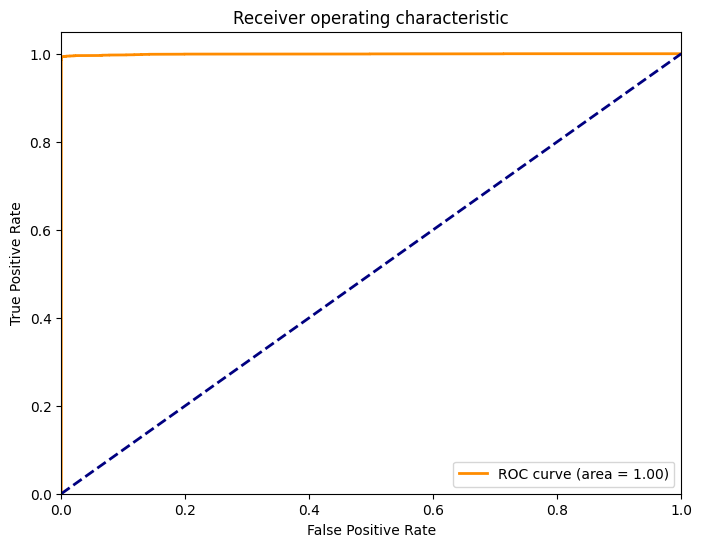

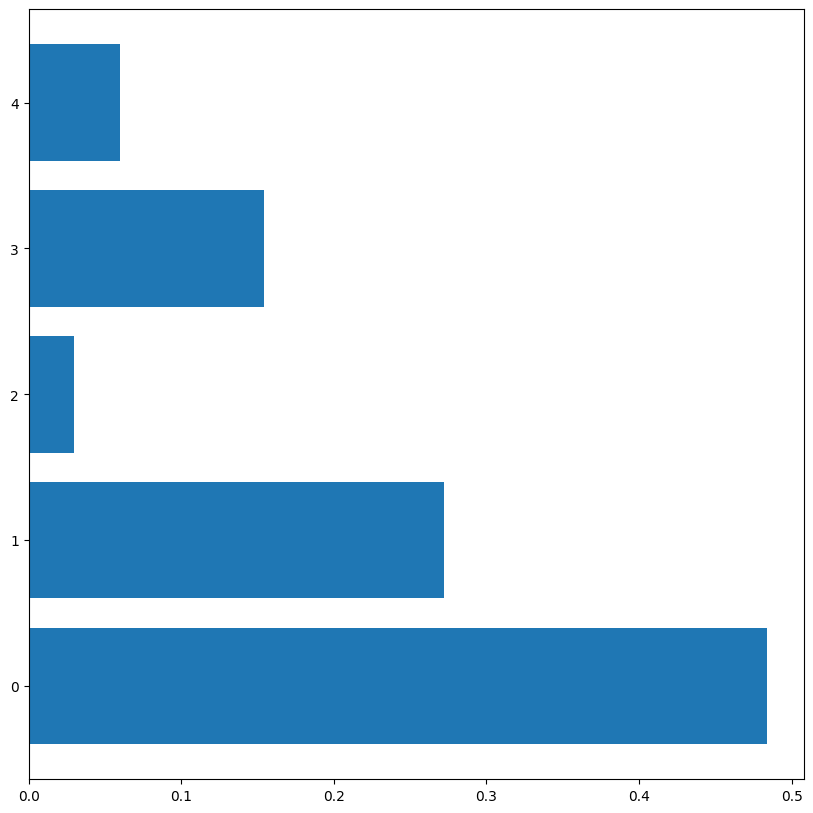

In [64]:
#Create XGBoost Classifier with best parameters
xgbBest = XGBClassifier(**study.best_params)
xgbBest.fit(X_train, Y_train)
xgbBest_pred = xgbBest.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, xgbBest_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, xgbBest_pred))
plot_roc_curve(Y_test, xgbBest.predict_proba(X_test)[::,1])

#Plot feature importance
plt.figure(figsize=(10, 10))
plt.barh(X.columns, xgbBest.feature_importances_)
plt.show()




In [65]:
#Predict fraud probability for test data
xgbBest_pred_test_prob = xgbBest.predict_proba(test)
xgbBest_pred_test_prob = pd.DataFrame(xgbBest_pred_test_prob)
xgbBest_pred_test_prob.head()


,0,1
0,0.999840,0.000160
1,0.996497,0.003503
2,0.999951,0.000049
3,0.999839,0.000161
4,0.999675,0.000325


In [66]:
#Length of xgbBest_pred_test_prob
len(xgbBest_pred_test_prob)

1845

In [67]:
#Create a dataframe with bTest alert_key column and xgbBest_pred_test_prob 1 column
my_submission_xgbBest = pd.DataFrame({'alert_key':bTest['alert_key'], 'probability':xgbBest_pred_test_prob[1]})
my_submission_xgbBest.head()


,alert_key,probability
0,352249,0.000160
1,352253,0.003503
2,352254,0.000049
3,352280,0.000161
4,352282,0.000325


In [68]:
#Combine my_submission_xgbBest and sample and replace the probability column with my_submission_xgbBest probability column
my_submission_xgbBest_combine = pd.merge(sample, my_submission_xgbBest, on='alert_key', how='left')
my_submission_xgbBest_combine.head()

,alert_key,probability_x,probability_y
0,357307,0.000017,0.000640
1,376329,0.000324,NaN
2,373644,0.000372,NaN
3,357668,0.000489,0.000100
4,354443,0.000526,0.000835


In [70]:
#Replace NaN values with 0
my_submission_xgbBest_combine['probability_y'] = my_submission_xgbBest_combine['probability_y'].fillna(0)

#Drop probability_x column
my_submission_xgbBest_combine = my_submission_xgbBest_combine.drop(['probability_x'], axis=1)

#rename probability_y column to probability
my_submission_xgbBest_combine = my_submission_xgbBest_combine.rename(columns={'probability_y': 'probability'})



In [71]:
#Head of my_submission_xgbBest_combine
my_submission_xgbBest_combine.head()

,alert_key,probability
0,357307,0.000640
1,376329,0.000000
2,373644,0.000000
3,357668,0.000100
4,354443,0.000835


In [ ]:
#Convert the dataframe to csv
my_submission_xgbBest_combine.to_csv('submission_xgbBest.csv', index=False)
